#Install and import libraries

In [ ]:
!pip install pyfim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 357 kB 4.0 MB/s 
  Created wheel for pyfim: filename=pyfim-6.28-cp38-cp38-linux_x86_64.whl size=540616 sha256=2672d6dc6e469238da7d7348772bc4a7453579fcd5b285b7d1573cfb813de1e8
  Stored in directory: /root/.cache/pip/wheels/63/55/a8/2c0948641da51af014ab239f1724b573a059005b8a51d282a2
Successfully built pyfim


In [ ]:
from fim import * #fim=frequent itemset mining
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Dataset
Market Database

In [ ]:
url = "https://gist.githubusercontent.com/Harsh-Git-Hub/2979ec48043928ad9033d8469928e751/raw/72de943e040b8bd0d087624b154d41b2ba9d9b60/retail_dataset.csv"

In [ ]:
df = pd.read_csv(url)
df.head()

,0,1,2,3,4,5,6
0,Bread,Wine,Eggs,Meat,Cheese,Pencil,Diaper
1,Bread,Cheese,Meat,Diaper,Wine,Milk,Pencil
2,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
3,Cheese,Meat,Eggs,Milk,Wine,NaN,NaN
4,Meat,Pencil,Wine,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(315, 7)

#Itemset Mining Methods

In [ ]:
#prueba del método de extracción de itemsets frecuentes
fpgrowth(df.values, supp=20) #extraer todos los itemsets frecuentes con al menos 20% de soporte mínimo

[((nan,), 274),
 (('Cheese', nan), 124),
 (('Cheese',), 158),
 (('Bread', nan), 125),
 (('Bread', 'Cheese'), 75),
 (('Bread',), 159),
 (('Milk', nan), 129),
 (('Milk', 'Cheese', nan), 74),
 (('Milk', 'Cheese'), 96),
 (('Milk', 'Bread'), 88),
 (('Milk',), 158),
 (('Meat', nan), 116),
 (('Meat', 'Cheese', nan), 74),
 (('Meat', 'Cheese'), 102),
 (('Meat', 'Bread'), 65),
 (('Meat', 'Milk', 'Cheese'), 64),
 (('Meat', 'Milk'), 77),
 (('Meat',), 150),
 (('Wine', nan), 100),
 (('Wine', 'Cheese'), 85),
 (('Wine', 'Bread'), 77),
 (('Wine', 'Milk'), 69),
 (('Wine', 'Meat'), 79),
 (('Wine',), 138),
 (('Eggs', nan), 106),
 (('Eggs', 'Cheese', nan), 69),
 (('Eggs', 'Cheese'), 94),
 (('Eggs', 'Milk'), 77),
 (('Eggs', 'Meat', 'Cheese'), 68),
 (('Eggs', 'Meat'), 84),
 (('Eggs', 'Wine'), 76),
 (('Eggs',), 138),
 (('Bagel', nan), 106),
 (('Bagel', 'Bread', nan), 67),
 (('Bagel', 'Bread'), 88),
 (('Bagel', 'Milk'), 71),
 (('Bagel',), 134),
 (('Diaper', nan), 100),
 (('Diaper', 'Cheese'), 63),
 (('Diaper',

In [ ]:
help(fpgrowth)

Help on built-in function fpgrowth in module fim:

fpgrowth(...)
    fpgrowth (tracts, target='s', supp=10, zmin=1, zmax=None, report='a',
              eval='x', agg='x', thresh=10, prune=Nobe, algo='s', mode='',
              border=None)
    Find frequent item sets with the FP-growth algorithm.
    tracts  transaction database to mine (mandatory)
            The database must be an iterable of transactions;
            each transaction must be an iterable of items;
            each item must be a hashable object.
            If the database is a dictionary, the transactions are
            the keys, the values their (integer) multiplicities.
    target  type of frequent item sets to find     (default: s)
            s/a   sets/all   all     frequent item sets
            c     closed     closed  frequent item sets
            m     maximal    maximal frequent item sets
            g     gens       generators
            r     rules      association rules
    supp    minimum support 

##Remove NaN from transactions

In [ ]:
data = []
for i in range(df.shape[0]): #para todas las filas/transacciones
  fila = df.iloc[i,:].values #recuperar la fila i con todas sus columnas
  fila = fila[~pd.isnull(fila)] #mantener todos los elementos que no sean null/nan en la fila
  data.append(fila.tolist()) #agregar la fila limpia a la data
data

[['Bread', 'Wine', 'Eggs', 'Meat', 'Cheese', 'Pencil', 'Diaper'],
 ['Bread', 'Cheese', 'Meat', 'Diaper', 'Wine', 'Milk', 'Pencil'],
 ['Cheese', 'Meat', 'Eggs', 'Milk', 'Wine'],
 ['Cheese', 'Meat', 'Eggs', 'Milk', 'Wine'],
 ['Meat', 'Pencil', 'Wine'],
 ['Eggs', 'Bread', 'Wine', 'Pencil', 'Milk', 'Diaper', 'Bagel'],
 ['Wine', 'Pencil', 'Eggs', 'Cheese'],
 ['Bagel', 'Bread', 'Milk', 'Pencil', 'Diaper'],
 ['Bread', 'Diaper', 'Cheese', 'Milk', 'Wine', 'Eggs'],
 ['Bagel', 'Wine', 'Diaper', 'Meat', 'Pencil', 'Eggs', 'Cheese'],
 ['Cheese', 'Meat', 'Eggs', 'Milk', 'Wine'],
 ['Bagel', 'Eggs', 'Meat', 'Bread', 'Diaper', 'Wine', 'Milk'],
 ['Bread', 'Diaper', 'Pencil', 'Bagel', 'Meat'],
 ['Bagel', 'Cheese', 'Milk', 'Meat'],
 ['Bread'],
 ['Pencil', 'Diaper', 'Bagel'],
 ['Meat', 'Bagel', 'Bread'],
 ['Bread', 'Bagel', 'Milk'],
 ['Diaper'],
 ['Bagel', 'Cheese', 'Meat', 'Bread', 'Diaper', 'Eggs'],
 ['Meat', 'Pencil', 'Cheese', 'Bread'],
 ['Cheese', 'Eggs', 'Wine', 'Bread', 'Milk', 'Pencil', 'Meat'],
 ['

In [ ]:
#extraer todos los itemsets frecuentes con al menos 20% de soporte mínimo y tamaño mínimo de 2
r = fpgrowth(data, supp=20, zmin=2)
df_ = pd.DataFrame(r)
df_.columns = ['Itemset', 'Freq']
df_.sort_values(by='Freq', ascending=False)

,Itemset,Freq
3,"(Meat, Cheese)",102
1,"(Milk, Cheese)",96
11,"(Eggs, Cheese)",94
2,"(Milk, Bread)",88
16,"(Bagel, Bread)",88
7,"(Wine, Cheese)",85
14,"(Eggs, Meat)",84
10,"(Wine, Meat)",79
12,"(Eggs, Milk)",77
6,"(Meat, Milk)",77


In [ ]:
#extraer todos los itemsets frecuentes con al menos 20 ocurrencias
fpgrowth(data, supp=-20)

[(('Cheese',), 158),
 (('Bread', 'Cheese'), 75),
 (('Bread',), 159),
 (('Milk', 'Cheese'), 96),
 (('Milk', 'Bread', 'Cheese'), 41),
 (('Milk', 'Bread'), 88),
 (('Milk',), 158),
 (('Meat', 'Cheese'), 102),
 (('Meat', 'Bread', 'Cheese'), 45),
 (('Meat', 'Bread'), 65),
 (('Meat', 'Milk', 'Cheese'), 64),
 (('Meat', 'Milk', 'Bread', 'Cheese'), 24),
 (('Meat', 'Milk', 'Bread'), 33),
 (('Meat', 'Milk'), 77),
 (('Meat',), 150),
 (('Wine', 'Cheese'), 85),
 (('Wine', 'Bread', 'Cheese'), 45),
 (('Wine', 'Bread'), 77),
 (('Wine', 'Milk', 'Cheese'), 51),
 (('Wine', 'Milk', 'Bread', 'Cheese'), 27),
 (('Wine', 'Milk', 'Bread'), 41),
 (('Wine', 'Milk'), 69),
 (('Wine', 'Meat', 'Cheese'), 53),
 (('Wine', 'Meat', 'Bread', 'Cheese'), 28),
 (('Wine', 'Meat', 'Bread'), 42),
 (('Wine', 'Meat', 'Milk', 'Cheese'), 32),
 (('Wine', 'Meat', 'Milk', 'Bread'), 24),
 (('Wine', 'Meat', 'Milk'), 40),
 (('Wine', 'Meat'), 79),
 (('Wine',), 138),
 (('Eggs', 'Cheese'), 94),
 (('Eggs', 'Bread', 'Cheese'), 37),
 (('Eggs', 

##Explore the data

[['Bread', 'Wine', 'Eggs', 'Meat', 'Cheese', 'Pencil', 'Diaper'], ['Bread', 'Cheese', 'Meat', 'Diaper', 'Wine', 'Milk', 'Pencil'], ['Cheese', 'Meat', 'Eggs', 'Milk', 'Wine'], ['Cheese', 'Meat', 'Eggs', 'Milk', 'Wine'], ['Meat', 'Pencil', 'Wine'], ['Eggs', 'Bread', 'Wine', 'Pencil', 'Milk', 'Diaper', 'Bagel'], ['Wine', 'Pencil', 'Eggs', 'Cheese'], ['Bagel', 'Bread', 'Milk', 'Pencil', 'Diaper'], ['Bread', 'Diaper', 'Cheese', 'Milk', 'Wine', 'Eggs'], ['Bagel', 'Wine', 'Diaper', 'Meat', 'Pencil', 'Eggs', 'Cheese'], ['Cheese', 'Meat', 'Eggs', 'Milk', 'Wine'], ['Bagel', 'Eggs', 'Meat', 'Bread', 'Diaper', 'Wine', 'Milk'], ['Bread', 'Diaper', 'Pencil', 'Bagel', 'Meat'], ['Bagel', 'Cheese', 'Milk', 'Meat'], ['Bread'], ['Pencil', 'Diaper', 'Bagel'], ['Meat', 'Bagel', 'Bread'], ['Bread', 'Bagel', 'Milk'], ['Diaper'], ['Bagel', 'Cheese', 'Meat', 'Bread', 'Diaper', 'Eggs'], ['Meat', 'Pencil', 'Cheese', 'Bread'], ['Cheese', 'Eggs', 'Wine', 'Bread', 'Milk', 'Pencil', 'Meat'], ['Eggs', 'Bagel', 'Chees

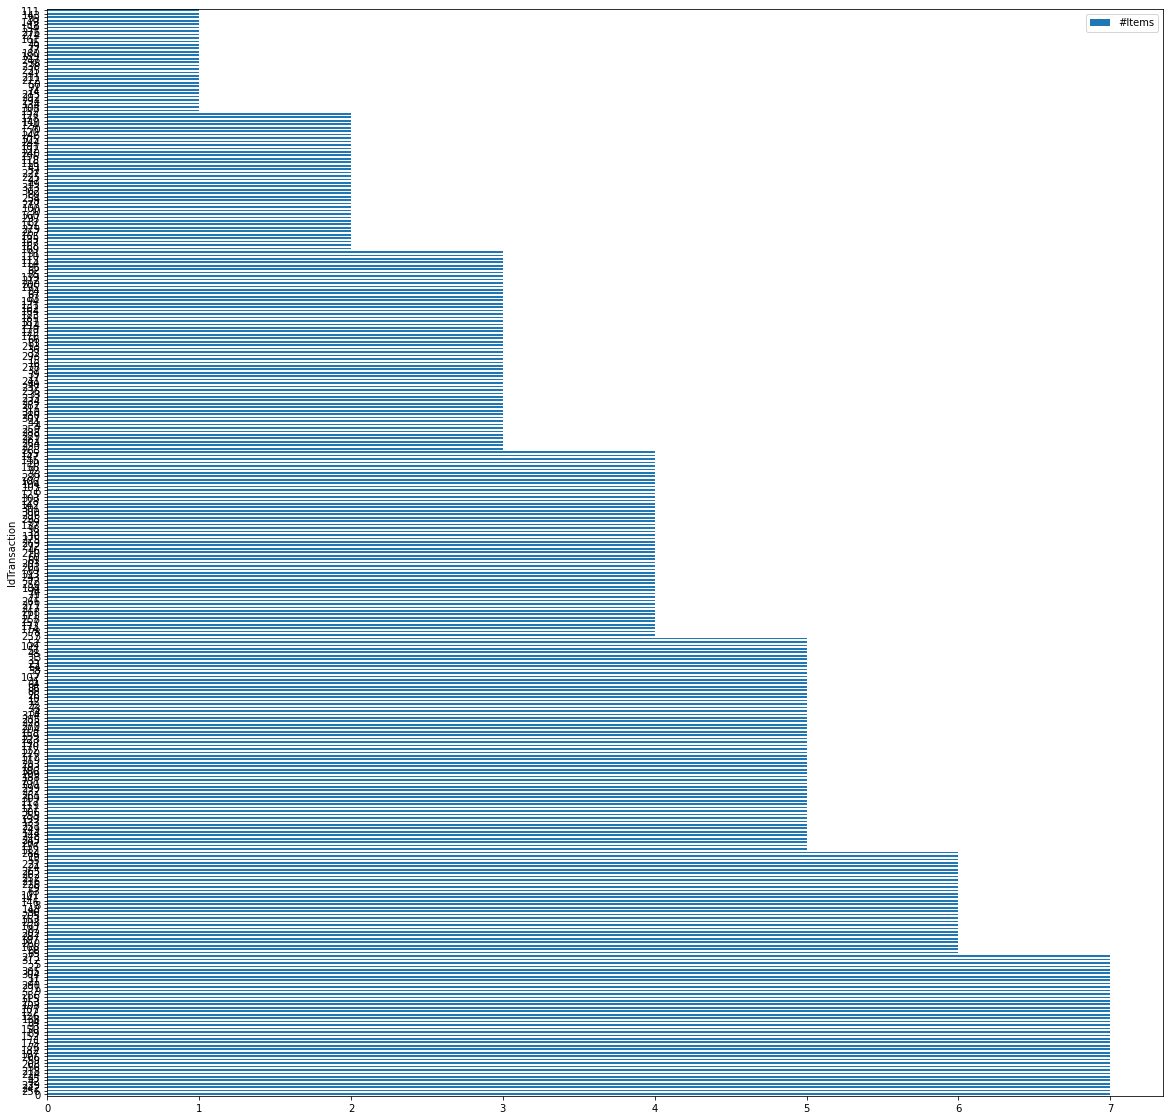

In [ ]:
print(data)
trans = [(i,len(data[i])) for i in range(len(data))] #bucle para obtener pares de elementos, con el índice y tamaño de cada transacción
print(trans)
#transformar el resultado en un dataframe
df_data = pd.DataFrame(trans)
df_data.columns = ['IdTransaction', '#Items']
df_data.sort_values(by='#Items', ascending=False, inplace=True)
df_data.plot.barh(x='IdTransaction', y='#Items', figsize=(20,20))
plt.show()

##Count by number of items

In [ ]:
df_data.groupby(['#Items']).count() #obtener el conteo de clientes según cantidad de items/productos en su transacción/canasta

,IdTransaction
#Items,
1,30
2,40
3,58
4,54
5,62
6,30
7,41


In [ ]:
df_data[df_data['#Items'] == 1] #obtener los clientes que compraron 1 solo producto

,IdTransaction,#Items
132,132,1
308,308,1
134,134,1
294,294,1
292,292,1
215,215,1
14,14,1
97,97,1
50,50,1
222,222,1


##Run the mining method


###All frequent itemsets with 1% minimum support and at most 1 item

In [ ]:
fpgrowth(data, supp=1, zmax=1)

[(('Cheese',), 158),
 (('Bread',), 159),
 (('Milk',), 158),
 (('Meat',), 150),
 (('Wine',), 138),
 (('Eggs',), 138),
 (('Bagel',), 134),
 (('Diaper',), 128),
 (('Pencil',), 114)]

###All frequent itemsets with 10% and 2 items

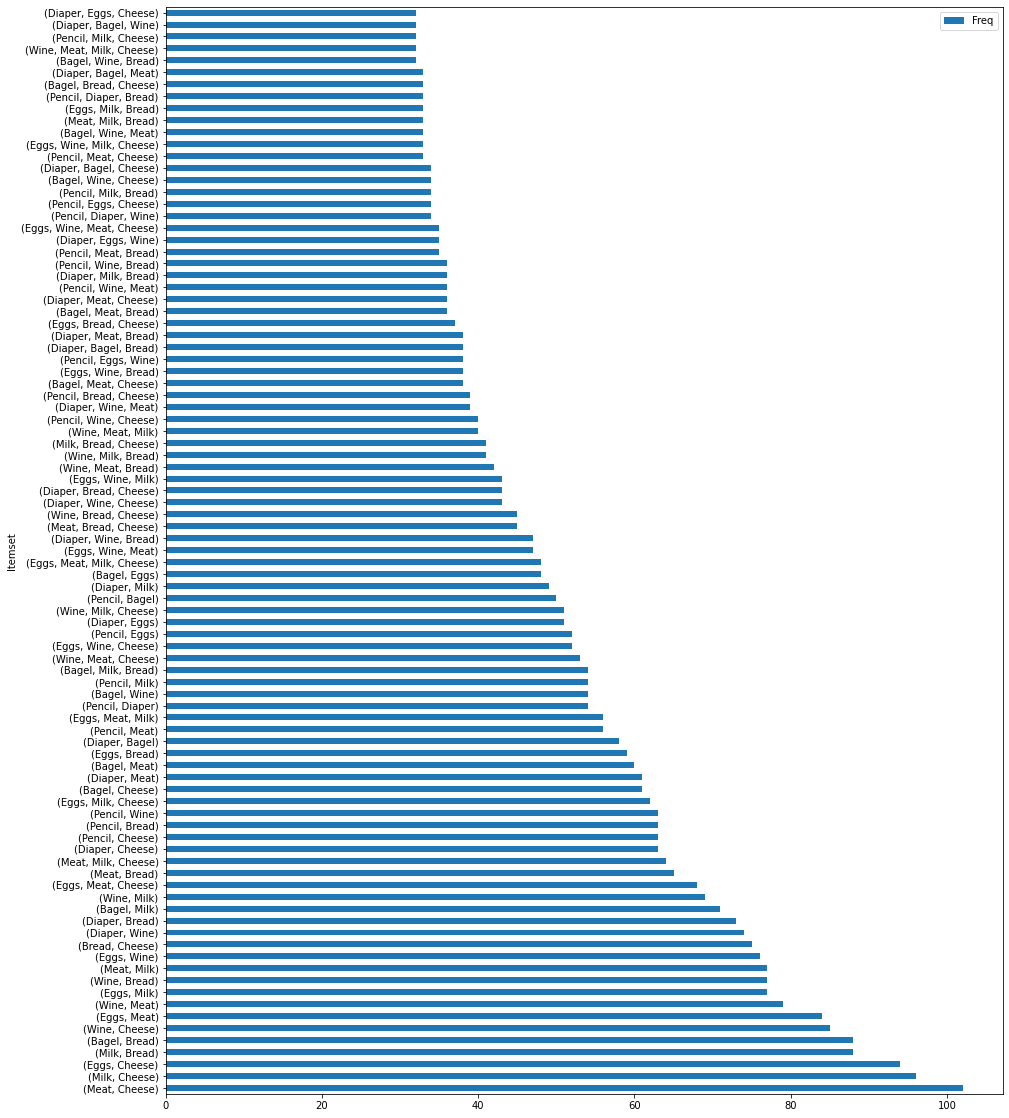

In [ ]:
r = fpgrowth(data, supp=10, zmin=2)
df_itemsets = pd.DataFrame(r)
df_itemsets.columns = ['Itemset', 'Freq']
df_itemsets.sort_values(by='Freq', ascending=False, inplace=True)
df_itemsets.plot.barh(x='Itemset', y='Freq', figsize=(15,20))
plt.show()

##Plot results

In [ ]:
!pip install hypernetx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 89 kB 3.5 MB/s 
     |████████████████████████████████| 3.3 MB 28.7 MB/s 
  Created wheel for python-igraph: filename=python_igraph-0.10.2-py3-none-any.whl size=9074 sha256=fca7149f722fecfd800004431d08a05ed05ad823b118c499960c6fd0e4075855
  Stored in directory: /root/.cache/pip/wheels/47/93/11/c7c992fab551e7a7fa504097aac4b992dac996aa1c81490afb
Successfully built python-igraph
  Attempting uninstall: decorator
    Found existing installation: decorator 4.4.2
    Uninstalling decorator-4.4.2:
      Successfully uninstalled decorator-4.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.
moviepy 0.2.3.5 requires decorator<5.0,>=4.0.2, but you have decorator 5.1.1 which is

In [ ]:
import hypernetx as hnx

{102: ('Meat', 'Cheese'), 96: ('Milk', 'Cheese'), 94: ('Eggs', 'Cheese'), 88: ('Milk', 'Bread'), 85: ('Wine', 'Cheese'), 84: ('Eggs', 'Meat'), 79: ('Wine', 'Meat'), 77: ('Eggs', 'Milk')}


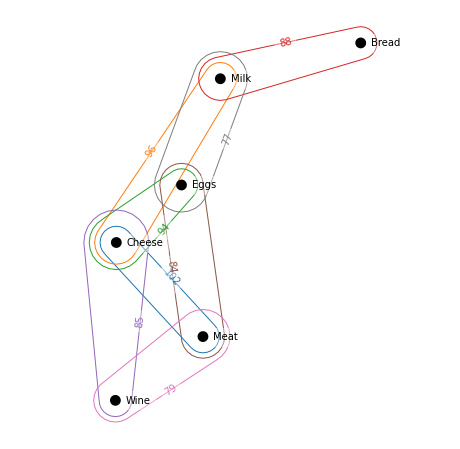

In [ ]:
v = df_itemsets.iloc[:10,:].values #recuperar los 10 itemsets más frecuentes
#definir las entradas para el hipergrafo
scenes = {}
k = 1
for i in range(len(v)): #para cada itemset
  nodos = v[i][0] #recuperar el itemset
  if v[i][1] not in scenes:
    scenes[v[i][1]] = tuple(nodos)
print(scenes)
#dibujar hipergrafo
H = hnx.Hypergraph(scenes)
hnx.draw(H)

#Real Data: [LastFM](https://www.last.fm/es/)

In [ ]:
lastfm = pd.read_csv("https://www.biz.uiowa.edu/faculty/jledolter/DataMining/lastfm.csv")
lastfm.shape

(289955, 4)

In [ ]:
lastfm.head(20)

,user,artist,sex,country
0,1,red hot chili peppers,f,Germany
1,1,the black dahlia murder,f,Germany
2,1,goldfrapp,f,Germany
3,1,dropkick murphys,f,Germany
4,1,le tigre,f,Germany
5,1,schandmaul,f,Germany
6,1,edguy,f,Germany
7,1,jack johnson,f,Germany
8,1,eluveitie,f,Germany
9,1,the killers,f,Germany


##Data Pre-processing

In [ ]:
#quitar columnas
lastfm = lastfm[['user', 'artist']]

In [ ]:
#eliminar duplicados
lastfm = lastfm.drop_duplicates()
lastfm.shape

(289953, 2)

In [ ]:
lastfm.head()

,user,artist
0,1,red hot chili peppers
1,1,the black dahlia murder
2,1,goldfrapp
3,1,dropkick murphys
4,1,le tigre


In [ ]:
#contar la cantidad de usuarios distintos
print(len(lastfm['user'].unique()))
print(lastfm['user'].unique())

15000
[    1     3     4 ... 19715 19717 19718]


In [ ]:
#contar la cantidad de artistas distintos
print(len(lastfm['artist'].unique()))
print(lastfm['artist'].unique())

1004
['red hot chili peppers' 'the black dahlia murder' 'goldfrapp' ...
 'immortal technique' 'delerium' 'finch']


##Transforming the data into a transactional dataset

In [ ]:
trans = []
for u in lastfm['user'].unique(): #para cada usuario único, se debe recuperar la lista de los artistas que sigue
  #print(u,lastfm[lastfm['user'] == u]['artist'].values)
  trans.append(list(lastfm[lastfm['user'] == u]['artist'].values))
print(len(trans))

15000


In [ ]:
print('El usuario {} escucha a {}'.format(0,trans[0]))
print('El usuario {} escucha a {}'.format(10,trans[10]))
print('El usuario {} escucha a {}'.format(100,trans[100]))
print('El usuario {} escucha a {}'.format(1000,trans[1000]))
print('El usuario {} escucha a {}'.format(5000,trans[5000]))
print('El usuario {} escucha a {}'.format(10000,trans[10000]))

El usuario 0 escucha a ['red hot chili peppers', 'the black dahlia murder', 'goldfrapp', 'dropkick murphys', 'le tigre', 'schandmaul', 'edguy', 'jack johnson', 'eluveitie', 'the killers', 'judas priest', 'rob zombie', 'john mayer', 'the who', 'guano apes', 'the rolling stones']
El usuario 10 escucha a ['sonata arctica', 'infected mushroom', 'iron maiden', 'creedence clearwater revival', 'nightwish', 'mindless self indulgence', 'electric light orchestra', 'john williams', 'michael jackson', 'fleetwood mac', 'aphex twin']
El usuario 100 escucha a ['queens of the stone age', 'pantera', 'nine inch nails', 'no doubt', 'down', 'guns n roses', 'the smashing pumpkins', 'iron maiden', 'guano apes', 'the offspring', 'metallica', 'fatboy slim', 'pearl jam', 'pink', 'alice in chains', 'marilyn manson', 'slipknot', 'eric clapton', 'iced earth', 'black sabbath', 'red hot chili peppers', 'u2', 'as i lay dying', 'godsmack', 'avril lavigne', 'led zeppelin', 'john williams', 'in flames', 'isis', 'stone 

##Mining itemsets

In [ ]:
#extraer todos los itemsets frecuentes con al menos 1% de soporte mínimo y 2 items como mínimo
fpgrowth(trans, supp=1, zmin=2)

[(('the beatles', 'radiohead'), 873),
 (('coldplay', 'radiohead'), 819),
 (('coldplay', 'the beatles', 'radiohead'), 293),
 (('coldplay', 'the beatles'), 665),
 (('red hot chili peppers', 'radiohead'), 474),
 (('red hot chili peppers', 'the beatles', 'radiohead'), 187),
 (('red hot chili peppers', 'the beatles'), 508),
 (('red hot chili peppers', 'coldplay', 'radiohead'), 222),
 (('red hot chili peppers', 'coldplay', 'the beatles'), 201),
 (('red hot chili peppers', 'coldplay'), 579),
 (('muse', 'radiohead'), 645),
 (('muse', 'the beatles', 'radiohead'), 207),
 (('muse', 'the beatles'), 408),
 (('muse', 'coldplay', 'radiohead'), 275),
 (('muse', 'coldplay', 'the beatles'), 184),
 (('muse', 'coldplay'), 582),
 (('muse', 'red hot chili peppers', 'radiohead'), 168),
 (('muse', 'red hot chili peppers', 'coldplay'), 181),
 (('muse', 'red hot chili peppers'), 406),
 (('metallica', 'radiohead'), 263),
 (('metallica', 'the beatles'), 336),
 (('metallica', 'coldplay'), 261),
 (('metallica', 're

##Mining Association Rules

###support 1% and confidence 40%

In [ ]:
ar = fpgrowth(trans, target='r', supp=1, conf=40, report='aSC')
ar

#('coldplay', 'the beatles') -> 'radiohead'
#conf(('coldplay', 'the beatles') -> 'radiohead') = freq(('coldplay', 'the beatles') -> 'radiohead') / freq(('coldplay', 'the beatles'))
#conf(('coldplay', 'the beatles') -> 'radiohead') = 293 / 665 = 0.4406

[('radiohead',
  ('coldplay', 'the beatles'),
  293,
  1.9533333333333334,
  44.06015037593985),
 ('coldplay',
  ('red hot chili peppers', 'radiohead'),
  222,
  1.48,
  46.835443037974684),
 ('radiohead',
  ('red hot chili peppers', 'coldplay', 'the beatles'),
  92,
  0.6133333333333334,
  45.77114427860697),
 ('the beatles',
  ('red hot chili peppers', 'coldplay', 'radiohead'),
  92,
  0.6133333333333334,
  41.44144144144144),
 ('coldplay',
  ('red hot chili peppers', 'the beatles', 'radiohead'),
  92,
  0.6133333333333334,
  49.19786096256685),
 ('radiohead', ('muse', 'the beatles'), 207, 1.38, 50.73529411764706),
 ('radiohead',
  ('muse', 'coldplay'),
  275,
  1.8333333333333333,
  47.250859106529205),
 ('coldplay',
  ('muse', 'radiohead'),
  275,
  1.8333333333333333,
  42.63565891472868),
 ('radiohead',
  ('muse', 'coldplay', 'the beatles'),
  96,
  0.64,
  52.17391304347826),
 ('coldplay',
  ('muse', 'the beatles', 'radiohead'),
  96,
  0.64,
  46.3768115942029),
 ('coldplay',
 

In [ ]:
df_ar = pd.DataFrame(ar)
df_ar.columns = ['Consecuente', 'Antecendente', 'Freq', 'Freq(%)', 'Conf']
df_ar.sort_values(by='Conf', ascending=False)

,Consecuente,Antecendente,Freq,Freq(%),Conf
1556,coldplay,"(keane, snow patrol)",118,0.786667,75.641026
440,radiohead,"(sigur rós, the cure)",106,0.706667,69.736842
1085,coldplay,"(snow patrol, oasis)",114,0.760000,69.512195
1550,coldplay,"(keane, muse)",115,0.766667,68.862275
1552,coldplay,"(keane, the killers)",143,0.953333,67.772512
...,...,...,...,...,...
2088,death cab for cutie,"(say anything,)",68,0.453333,40.000000
57,radiohead,"(nirvana, pink floyd)",122,0.813333,40.000000
1265,belle and sebastian,"(sufjan stevens, the shins)",82,0.546667,40.000000
2096,the beatles,"(cat stevens,)",70,0.466667,40.000000


###support 0.05% and confidence 40%

In [ ]:
ar = fpgrowth(trans, target='r', supp=0.05, conf=40, report='aC')
print('Hay {} reglas'.format(len(ar)))

Hay 12688286 reglas


In [ ]:
ar

[('radiohead', ('coldplay', 'the beatles'), 293, 44.06015037593985),
 ('coldplay', ('red hot chili peppers', 'radiohead'), 222, 46.835443037974684),
 ('radiohead',
  ('red hot chili peppers', 'coldplay', 'the beatles'),
  92,
  45.77114427860697),
 ('the beatles',
  ('red hot chili peppers', 'coldplay', 'radiohead'),
  92,
  41.44144144144144),
 ('coldplay',
  ('red hot chili peppers', 'the beatles', 'radiohead'),
  92,
  49.19786096256685),
 ('radiohead', ('muse', 'the beatles'), 207, 50.73529411764706),
 ('radiohead', ('muse', 'coldplay'), 275, 47.250859106529205),
 ('coldplay', ('muse', 'radiohead'), 275, 42.63565891472868),
 ('radiohead', ('muse', 'coldplay', 'the beatles'), 96, 52.17391304347826),
 ('coldplay', ('muse', 'the beatles', 'radiohead'), 96, 46.3768115942029),
 ('coldplay', ('muse', 'the beatles'), 184, 45.09803921568628),
 ('radiohead', ('muse', 'red hot chili peppers'), 168, 41.37931034482759),
 ('radiohead',
  ('muse', 'red hot chili peppers', 'the beatles'),
  60,
 